# Importing libs

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 

## data Collection and Preprocessing

In [45]:
gold_data = pd.read_csv(r'C:\Users\dell\Desktop\Data Science Diploma\Project 8. Gold Price Prediction using Machine Learning with Python\archive\gld_price_data.csv')

In [46]:
#print first 5 rows in dataFrame
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [47]:
#print the last 5 rows of dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [48]:
# number of rows and cols
gold_data.shape

(2290, 6)

In [49]:
#getting information about data
gold_data.info()
#missing values=no

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [50]:
# checking the number of missing values
gold_data.isnull().sum()
#no of missing values = 0

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [51]:
#getting statistical measures of datta
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [52]:
#25% are less than 1239.874969 of SPX
#50% are less than 1551.434998 of SPX
#mean what is the range of values lies

## Correlation (EDA) 
- +ve
- -ve

In [53]:
correlation = gold_data.corr()

<AxesSubplot:>

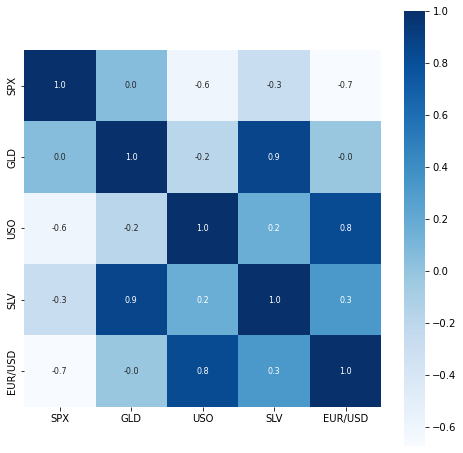

In [54]:
# construct a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [55]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


D:\New folder (2)\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

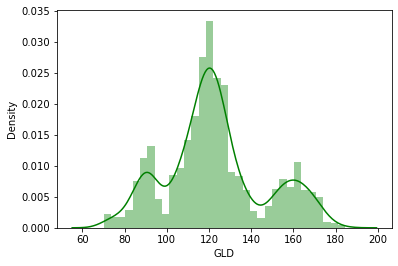

In [56]:
# Disribution of Gold Price
sns.distplot(gold_data['GLD'],color='green')
#most values lies around 120
#few values after 160 , before 80
#pump around 90 , 160
#density is number of values we have is it a percentage 

## splitting the feature and target 

In [57]:
X =gold_data.drop(['Date','GLD'], axis=1)
Y = gold_data['GLD']

In [58]:
 print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


## Splitting the Training data and test data

In [59]:
X_train ,X_test ,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

## model training
- random forest regressor

In [60]:
 regressor = RandomForestRegressor(n_estimators=100)

In [61]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

## model evaluation


In [62]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [63]:
print(test_data_prediction)

[168.78599949  81.47620012 115.9955001  127.52720058 120.82580127
 154.77289764 150.28299979 126.10810049 117.37939867 125.84540111
 116.52680089 171.9323007  142.01999898 167.7980986  115.24130009
 117.69820037 138.45090239 170.16100044 159.69100289 158.5512992
 155.13829936 125.3303002  175.60409967 157.06860383 125.23590025
  93.82099972  77.06610023 120.85849991 119.09509929 167.47699976
  88.15580064 125.06750008  91.01720059 117.83489985 121.10909926
 136.1093999  115.42380134 115.20690082 147.71109992 107.04930086
 104.33650242  87.200798   126.50170017 118.03549988 153.09199908
 119.56100016 108.30689978 107.83179814  93.26540077 127.01559804
  74.69410061 113.62649901 121.3166003  111.34299899 118.82819888
 120.04529951 159.58769908 168.40200072 147.06989683  85.95629867
  94.21430073  86.85729883  90.56349982 118.85260091 126.48620069
 127.61469994 170.09239944 122.25679933 117.32269905  98.39820039
 168.26880102 142.70509806 132.42620204 121.07380207 120.18669958
 119.770500

In [64]:
#R square error
error_score =metrics.r2_score(Y_test,test_data_prediction)
print("R squared error : " ,error_score)
#to know if this number is good or not we need to look at the range of data

R squared error :  0.9890004292758088


## Visualise the Comapre between actual and predictied Values in a plot

In [65]:
Y_test = list(Y_test)


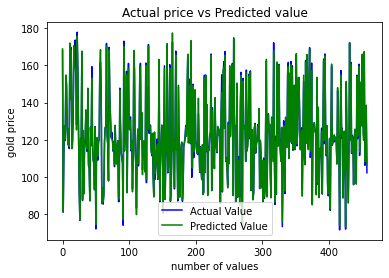

In [66]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction, color='green' ,label='Predicted Value')
plt.title('Actual price vs Predicted value')
plt.xlabel('number of values')
plt.ylabel('gold price')
plt.legend()
plt.show()